# Case Study : Bike Sharing
## Requirement - Predicting bike sharing post Covid lockdown
##                          -   Significant Variables
##                          -   How well the variables describe the outcome.

### Provided : Dataset of Bike-shairng data- actual demand and supply with available independent and dependent variables. 

- Mindfull business plan
- Need factors to determine demands of these bikes depend  
- How well these variables describe the demand

### Steps:
    1  Data preperation and Data Cleaning
    2. EDA( Univariate and Bivariate)
    3. Linear Regression
       a. convert binary categorical variables to 0/1
       b. convert categorical variables with multiple values to dummy variables
       c. train-test-split --> 70:30
       d. Rescaling 
       e. Train model with train data set.
       f. Validation and remodelling( R2, VIF)
       g. Check if the  Assumptions hold ( y_train - y_train_pred is normally distributed)
       h. Prediction

In [176]:
## Imports
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;
import matplotlib.ticker as ticker;
import plotly.express as px

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error      
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

from sklearn.feature_selection import RFE

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [104]:
## Step1
data= pd.read_csv('day.csv')
data.head(20)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [105]:
# Removing 'casual' and 'registered' as these are not features and highly correlated with dependent var 'cnt'
data.drop(['casual', 'registered', 'instant'], inplace=True, axis=1)


In [106]:
# Checking for null, duplicate and consistent format values
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  cnt         730 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 74.3+ KB


In [107]:
print('Duplicate row counts',data.duplicated().sum())


Duplicate row counts 0


In [108]:
print('Null Value count',data.isnull().sum())

Null Value count dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


In [109]:
data['weekday'] = pd.DatetimeIndex(data['dteday'], dayfirst=True).day_name()
data['mnth'] = pd.DatetimeIndex(data['dteday'], dayfirst=True).month_name()

In [110]:
# Converting numeric values to readable format- will be used to create dummy variables  later on.  
# ['season']
data['season']=data['season'].map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
data['yr']=data['yr'].map({1:'2019', 0:'2018'})
data['holiday']=data['holiday'].map({0:'No', 1:'Yes'})
data['workingday']=data['workingday'].map({0:'No', 1:'Yes'})
data['weathersit']=data['weathersit'].map({1:'Clear', 2:'Mist + Cloudy', 3:'Light Snow/Light Rain', 4:'Heavy Rain/Ice Pellets'})


In [111]:
# Extracted all the values into yr, mnth  and weekday columns so, this is not needed.
data.drop(['dteday'], inplace=True, axis=1)

In [112]:
data.head(20)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,2018,January,No,Monday,No,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,2018,January,No,Tuesday,No,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,2018,January,No,Wednesday,Yes,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,2018,January,No,Thursday,Yes,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,2018,January,No,Friday,Yes,Clear,9.305237,11.46350,43.6957,12.522300,1600
5,Spring,2018,January,No,Saturday,Yes,Clear,8.378268,11.66045,51.8261,6.000868,1606
6,Spring,2018,January,No,Sunday,Yes,Mist + Cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,Spring,2018,January,No,Monday,No,Mist + Cloudy,6.765000,8.11270,53.5833,17.875868,959
8,Spring,2018,January,No,Tuesday,No,Clear,5.671653,5.80875,43.4167,24.250650,822
9,Spring,2018,January,No,Wednesday,Yes,Clear,6.184153,7.54440,48.2917,14.958889,1321


## EDA 
### UniVariate Analysis

As we come to a conclusin that the 'cnt' is the dependent variable we will focus our analysis 'cnt' and other variables.


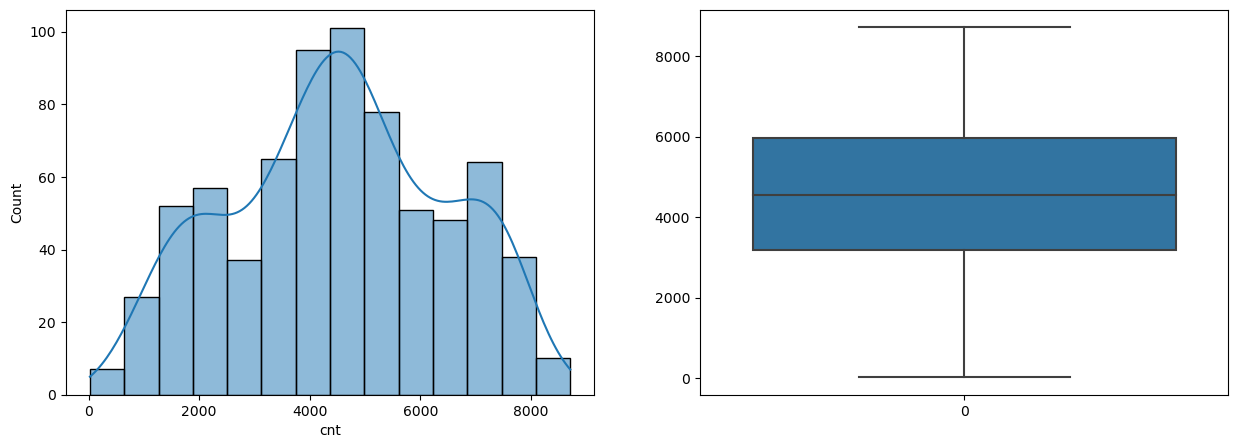

In [127]:
plt.figure(figsize=(15,5))
ax1=plt.subplot(1,2,1)
sns.histplot(data['cnt'], kde=True)
ax2=plt.subplot(1,2,2)
sns.boxplot(data['cnt'])
fig = px.box(data['cnt'])
plt.show()
fig.show()

# We can clearly see the spread and mean is around 4500 each day. 
 


## BiVariate Analysis


In [114]:
data.corr()

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.627044,0.630685,-0.098543,-0.235132,1.000000


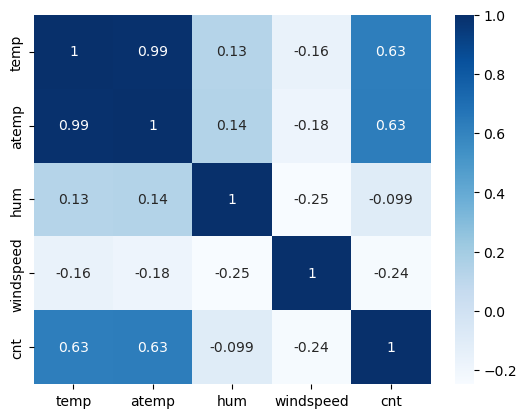

,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,4508.006849
std,7.506729,8.150308,14.237589,5.195841,1936.011647
min,2.424346,3.953480,0.000000,1.500244,22.000000
25%,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,5966.000000
max,35.328347,42.044800,97.250000,34.000021,8714.000000


In [115]:
data
#Categorical
#season, yr, mnth, holiday, weekday, workingday, weathersit

#Contineous
#temp, atemp, hum, windspeed

# plt.figure(figsize=[17,17])
sns.heatmap(data.corr(), annot=True, cmap="Blues")
plt.show()

data.describe()

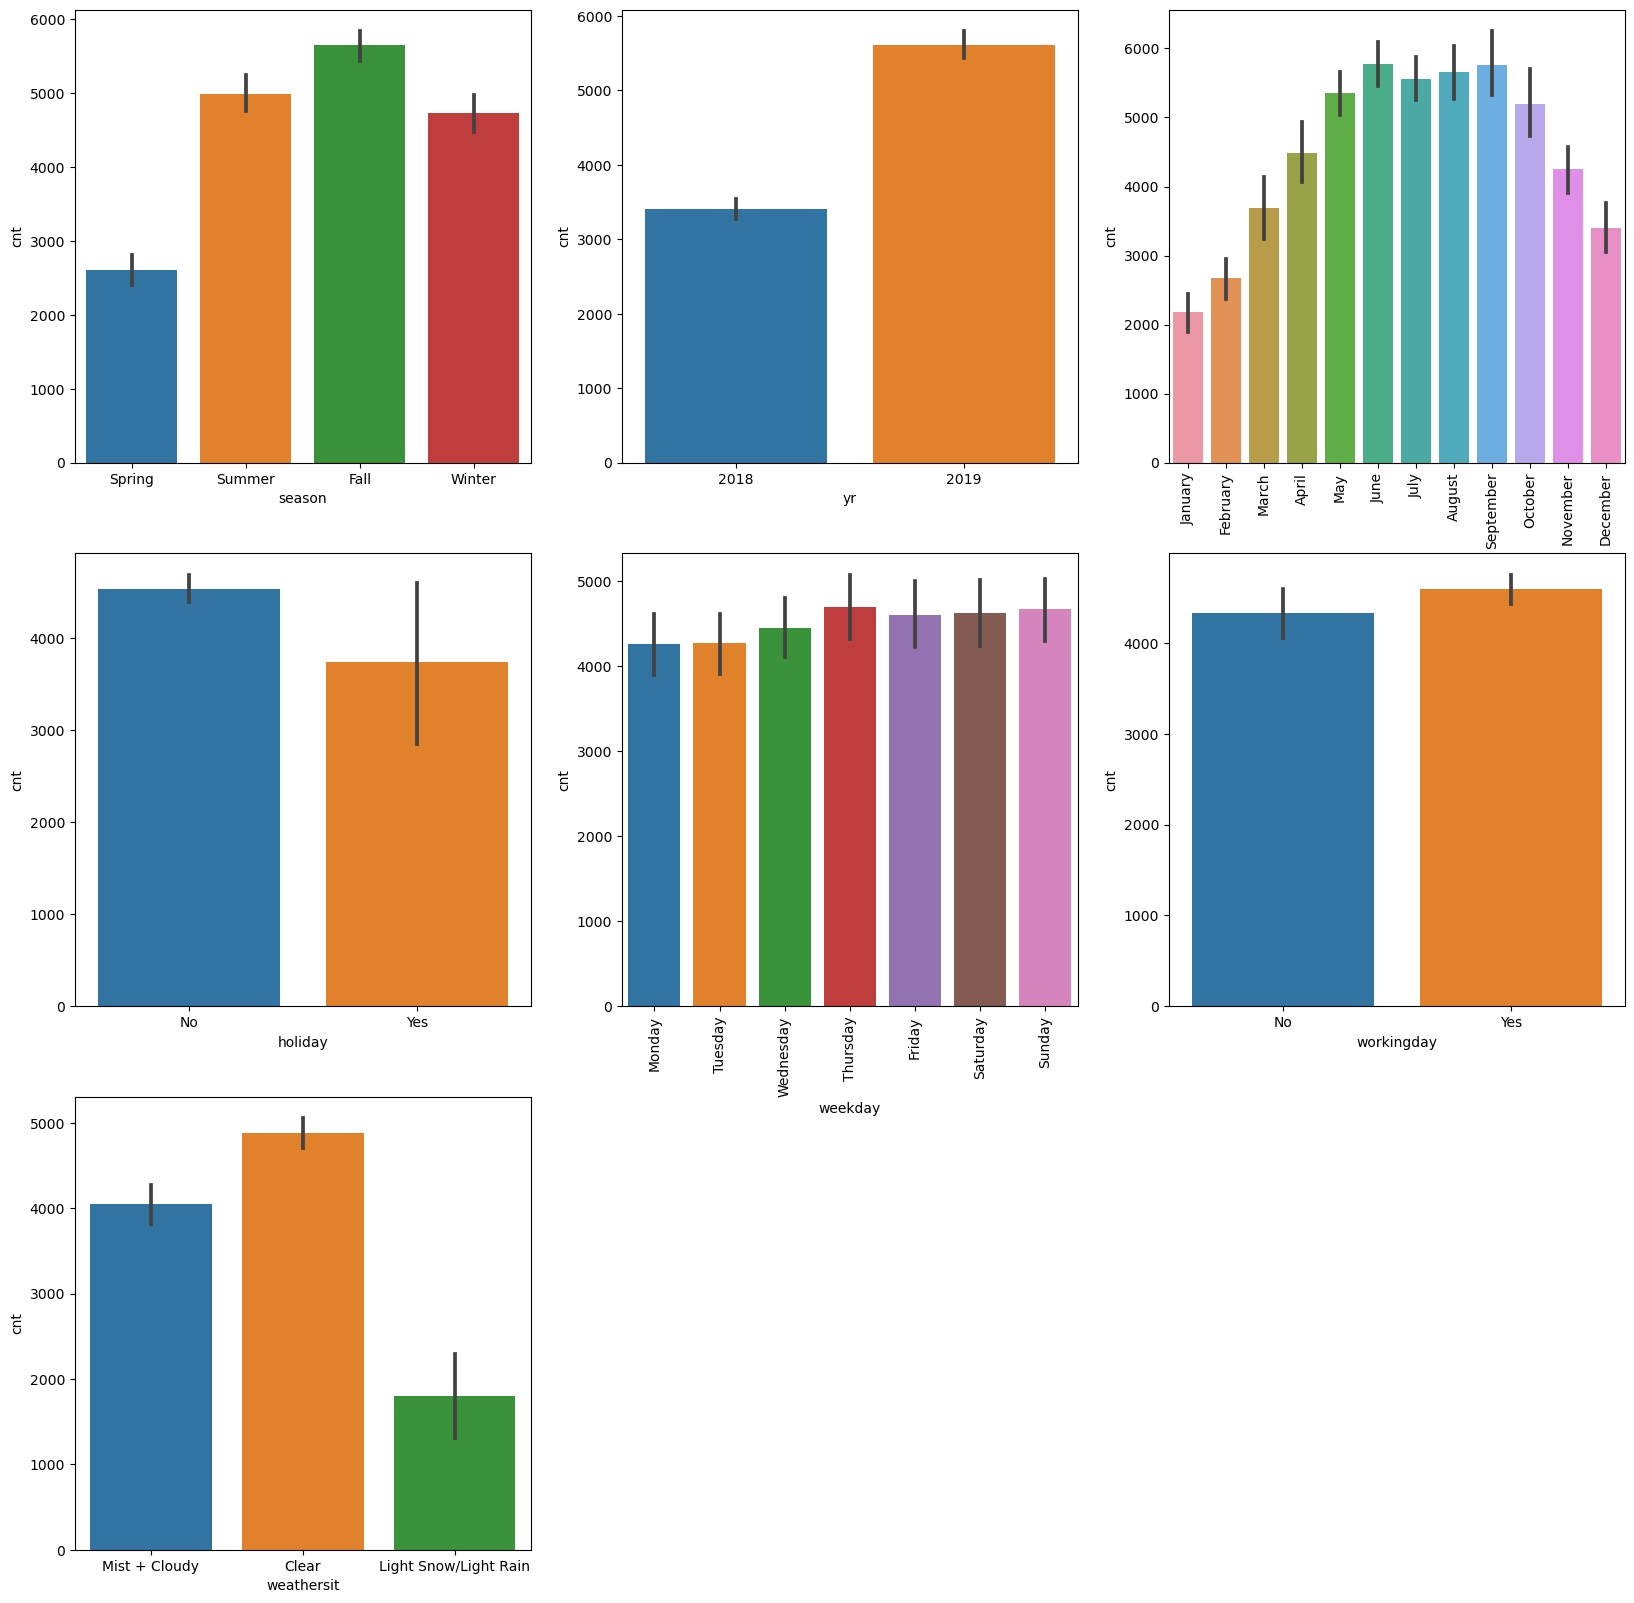

In [124]:
# season, yr, mnth, holiday, weekday, workingday, weathersit, cnt
plt.figure(figsize=(20,20))
ax1=plt.subplot(3,3,1)
sns.barplot(data=data, x='season', y='cnt')
ax2=plt.subplot(3,3,2)
sns.barplot(data=data, x='yr', y='cnt')
ax3=plt.subplot(3,3,3)
sns.barplot(data=data, x='mnth', y='cnt')
plt.xticks(rotation=90)
ax4=plt.subplot(3,3,4)
sns.barplot(data=data, x='holiday', y='cnt')
ax5=plt.subplot(3,3,5)
plt.xticks(rotation=90)
sns.barplot(data=data, x='weekday', y='cnt')
ax6=plt.subplot(3,3,6)
sns.barplot(data=data, x='workingday', y='cnt')
ax7=plt.subplot(3,3,7)
sns.barplot(data=data, x='weathersit', y='cnt')
plt.show()

In [129]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,2018,January,No,Monday,No,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,2018,January,No,Tuesday,No,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,2018,January,No,Wednesday,Yes,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,2018,January,No,Thursday,Yes,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,2018,January,No,Friday,Yes,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [130]:
# Creating dummies
dummies = pd.get_dummies(data[['season','yr','mnth','holiday','weekday','workingday','weathersit']], drop_first=True)

In [132]:
dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   season_Spring                     730 non-null    uint8
 1   season_Summer                     730 non-null    uint8
 2   season_Winter                     730 non-null    uint8
 3   yr_2019                           730 non-null    uint8
 4   mnth_August                       730 non-null    uint8
 5   mnth_December                     730 non-null    uint8
 6   mnth_February                     730 non-null    uint8
 7   mnth_January                      730 non-null    uint8
 8   mnth_July                         730 non-null    uint8
 9   mnth_June                         730 non-null    uint8
 10  mnth_March                        730 non-null    uint8
 11  mnth_May                          730 non-null    uint8
 12  mnth_November                     73

In [133]:
# Concat dummies to our dataframe.But before that delete original columns. 
data.drop(['season','yr','mnth','holiday','weekday','workingday','weathersit'], axis=1, inplace=True)

In [134]:
data

,temp,atemp,hum,windspeed,cnt
0,14.110847,18.18125,80.5833,10.749882,985
1,14.902598,17.68695,69.6087,16.652113,801
2,8.050924,9.47025,43.7273,16.636703,1349
3,8.200000,10.60610,59.0435,10.739832,1562
4,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...
725,10.420847,11.33210,65.2917,23.458911,2114
726,10.386653,12.75230,59.0000,10.416557,3095
727,10.386653,12.12000,75.2917,8.333661,1341
728,10.489153,11.58500,48.3333,23.500518,1796


In [135]:
# I am watching you :)
# 

In [136]:
# 

In [137]:
data_d = pd.concat([data,dummies], axis=1)

In [138]:
data_d

,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,yr_2019,mnth_August,...,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,weathersit_Light Snow/Light Rain,weathersit_Mist + Cloudy
0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,10.420847,11.33210,65.2917,23.458911,2114,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
726,10.386653,12.75230,59.0000,10.416557,3095,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,1
727,10.386653,12.12000,75.2917,8.333661,1341,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
728,10.489153,11.58500,48.3333,23.500518,1796,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [141]:
# Splitting the data_d in train and test
data_train,data_test = train_test_split(data_d, train_size=0.7, random_state=100)

In [147]:
data_train

,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,yr_2019,mnth_August,...,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,weathersit_Light Snow/Light Rain,weathersit_Mist + Cloudy
576,29.246653,33.14480,70.4167,11.083475,7216,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
426,16.980847,20.67460,62.1250,10.792293,4066,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
728,10.489153,11.58500,48.3333,23.500518,1796,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
482,15.443347,18.87520,48.9583,8.708325,4220,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
111,13.803347,16.09770,72.9583,14.707907,1683,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,30.852500,35.35440,65.9583,8.666718,7261,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
53,9.091299,12.28585,42.3043,6.305571,1917,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
350,10.591653,12.46855,56.0833,16.292189,2739,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
79,17.647835,20.48675,73.7391,19.348461,2077,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,1


In [150]:
#Applying Rescaling to variables
# Going with Normalization (Min-Max scaling as we have no outliers found in our data)

scaler=MinMaxScaler()
var_to_scale=['temp','atemp','hum','windspeed','cnt']
data_train[var_to_scale]=scaler.fit_transform(data_train[var_to_scale])
data_train

,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,yr_2019,mnth_August,...,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,weathersit_Light Snow/Light Rain,weathersit_Mist + Cloudy
576,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
426,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
728,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
482,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
111,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,0.863973,0.824359,0.679690,0.187140,0.832835,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
53,0.202618,0.218747,0.435939,0.111379,0.218017,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
350,0.248216,0.223544,0.577930,0.431816,0.312586,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
79,0.462664,0.434043,0.759870,0.529881,0.236424,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,1


# Building the RFE Model
## Using R F E to buld
### To build and train model train data we have to divide it into X and y (independent and dependent vars)

In [152]:
y_train = data_train.pop('cnt')
X_train = data_train



In [155]:
y_train.describe()
X_train.describe()

,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,yr_2019,mnth_August,mnth_December,...,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,weathersit_Light Snow/Light Rain,weathersit_Mist + Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.243137,0.247059,0.247059,0.507843,0.096078,0.084314,...,0.025490,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.676471,0.029412,0.345098
std,0.225858,0.212410,0.145846,0.169803,0.429398,0.431725,0.431725,0.500429,0.294988,0.278131,...,0.157763,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.468282,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.542596,0.529718,0.653714,0.296763,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.735215,0.688457,0.754830,0.414447,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [160]:
# Init model
lr=LinearRegression()
lr.fit(X_train,y_train)

rfe=RFE(lr,n_features_to_select=20)
rfe=rfe.fit(X_train,y_train)


In [166]:
# rfe_col has the RFE selected columns
rfe_col=X_train.columns[rfe.support_]

rfe_col

Index(['temp', 'atemp', 'hum', 'windspeed', 'season_Spring', 'season_Summer',
       'season_Winter', 'yr_2019', 'mnth_December', 'mnth_February',
       'mnth_January', 'mnth_July', 'mnth_May', 'mnth_November',
       'mnth_September', 'holiday_Yes', 'weekday_Monday', 'weekday_Tuesday',
       'weathersit_Light Snow/Light Rain', 'weathersit_Mist + Cloudy'],
      dtype='object')

In [169]:
# Now training the model again with RFE selected columns. Creating new X_train_rfe
X_train_rfe=X_train[rfe_col]


## Creating regression model 'A' with statsmodel


In [171]:
# Adding constant to X_train_rfe
X_train_sm = sm.add_constant(X_train_rfe)


# init model
model = sm.OLS(y_train,X_train_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     137.7
Date:                Tue, 12 Sep 2023   Prob (F-statistic):          2.89e-186
Time:                        23:39:09   Log-Likelihood:                 521.39
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     489   BIC:                            -911.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.3453      0.037      9.233      0.000       0.272       0.419
temp                                 0.4195      0.135      3.113      0.002       0.155       0.684
atemp                                0.0354      0.136      0.260      0.795      -0.232       0.303
hum                                 -0.1589      0.038     -4.186      0.000      -0.233      -0.084
windspeed                           -0.1813      0.026     -6.924      0.000      -0.233      -0.130
season_Spring                       -0.0556      0.022     -2.494      0.013      -0.099      -0.012
season_Summer                        0.0298      0.017      1.714      0.087      -0.004       0.064
season_Winter                        0.0995      0.018      5.440      0.000       0.064       0.136
yr_2019                              0.2314      0.008     28.793      0.000       0.216       0.247
mnth_December                       -0.0473      0.018     -2.589      0.010      -0.083      -0.011
mnth_February                       -0.0377      0.022     -1.746      0.081      -0.080       0.005
mnth_January                        -0.0644      0.021     -3.010      0.003      -0.106      -0.022
mnth_July                           -0.0500      0.018     -2.750      0.006      -0.086      -0.014
mnth_May                             0.0202      0.017      1.160      0.247      -0.014       0.054
mnth_November                       -0.0462      0.019     -2.442      0.015      -0.083      -0.009
mnth_September                       0.0736      0.017      4.381      0.000       0.041       0.107
holiday_Yes                         -0.0899      0.026     -3.523      0.000      -0.140      -0.040
weekday_Monday                      -0.0259      0.011     -2.320      0.021      -0.048      -0.004
weekday_Tuesday                     -0.0276      0.011     -2.450      0.015      -0.050      -0.005
weathersit_Light Snow/Light Rain    -0.2507      0.026     -9.501      0.000      -0.303      -0.199
weathersit_Mist + Cloudy            -0.0565      0.010     -5.441      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       75.055   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.627
Skew:                          -0.736   Prob(JB):                     2.01e-43
Kurtosis:                       5.663   Cond. No.                         80.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [179]:
# Dropping the columns which show up > 0.05 as p value

col_to_dropo=['atemp','season_Summer','mnth_February','mnth_May']
X_train_refined=X_train_rfe.drop(col_to_dropo, axis=1)

In [180]:
X_train_refined

,temp,hum,windspeed,season_Spring,season_Winter,yr_2019,mnth_December,mnth_January,mnth_July,mnth_November,mnth_September,holiday_Yes,weekday_Monday,weekday_Tuesday,weathersit_Light Snow/Light Rain,weathersit_Mist + Cloudy
576,0.815169,0.725633,0.264686,0,0,1,0,0,1,0,0,0,0,0,0,0
426,0.442393,0.640189,0.255342,1,0,1,0,0,0,0,0,0,0,0,0,1
728,0.245101,0.498067,0.663106,1,0,1,1,0,0,0,0,0,1,0,0,0
482,0.395666,0.504508,0.188475,0,0,1,0,0,0,0,0,0,0,0,0,1
111,0.345824,0.751824,0.380981,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,0.863973,0.679690,0.187140,0,0,1,0,0,0,0,0,0,0,0,0,0
53,0.202618,0.435939,0.111379,1,0,0,0,0,0,0,0,0,0,0,0,0
350,0.248216,0.577930,0.431816,0,1,0,1,0,0,0,0,0,1,0,0,1
79,0.462664,0.759870,0.529881,0,0,0,0,0,0,0,0,0,0,0,0,1


## Creating regression model 'B' with statsmodel
### -Using refined X_train_sm


In [181]:
X_train_sm = sm.add_constant(X_train_refined)

model = sm.OLS(y_train,X_train_sm).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     168.6
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          4.43e-188
Time:                        00:31:56   Log-Likelihood:                 515.14
No. Observations:                 510   AIC:                            -996.3
Df Residuals:                     493   BIC:                            -924.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.3727      0.032     11.784      0.000       0.311       0.435
temp                                 0.4295      0.033     13.079      0.000       0.365       0.494
hum                                 -0.1433      0.038     -3.804      0.000      -0.217      -0.069
windspeed                           -0.1749      0.026     -6.809      0.000      -0.225      -0.124
season_Spring                       -0.1025      0.015     -6.687      0.000      -0.133      -0.072
season_Winter                        0.0729      0.014      5.155      0.000       0.045       0.101
yr_2019                              0.2315      0.008     28.649      0.000       0.216       0.247
mnth_December                       -0.0454      0.017     -2.632      0.009      -0.079      -0.012
mnth_January                        -0.0508      0.018     -2.834      0.005      -0.086      -0.016
mnth_July                           -0.0684      0.017     -3.984      0.000      -0.102      -0.035
mnth_November                       -0.0487      0.019     -2.628      0.009      -0.085      -0.012
mnth_September                       0.0565      0.015      3.659      0.000       0.026       0.087
holiday_Yes                         -0.0927      0.026     -3.614      0.000      -0.143      -0.042
weekday_Monday                      -0.0263      0.011     -2.341      0.020      -0.048      -0.004
weekday_Tuesday                     -0.0272      0.011     -2.399      0.017      -0.049      -0.005
weathersit_Light Snow/Light Rain    -0.2571      0.026     -9.737      0.000      -0.309      -0.205
weathersit_Mist + Cloudy            -0.0580      0.010     -5.544      0.000      -0.079      -0.037
==============================================================================
Omnibus:                       68.027   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.309
Skew:                          -0.664   Prob(JB):                     7.02e-40
Kurtosis:                       5.592   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Analysis 1: We can go with the latest modedl as all the P value seems to be in permissable range and Rsquared also seems to indicate good feature selection.
### Now also calculating VIFs to 
    1. Detect Multicollinearity
    2. Improving model performance
    3. Avoiding Overfitting

Steps to follow:

1. High p-val + high VIF  [Remove at once]
2. Mixed
    - High p-val and Low VIF [Remove and recalculate VIF]
    - Low p-Val and High VIF [Remove these if the VIF does not come down after above deletion]
3. Low p-val and low VIF [Can be kept]
    

In [182]:
vif=pd.DataFrame()
X=X_train_refined
vif['features'] = X.columns
vif['vif'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['vif'] = round(vif['vif'],2)

vif=vif.sort_values(by='vif',ascending=False)
vif

,features,vif
1,hum,24.93
0,temp,16.88
2,windspeed,4.12
4,season_Winter,3.00
3,season_Spring,2.93
15,weathersit_Mist + Cloudy,2.28
5,yr_2019,2.07
9,mnth_November,1.84
7,mnth_January,1.75
6,mnth_December,1.55


### VIFs seems to be in permissable range which is 5. 